<a href="https://colab.research.google.com/github/PritishRane/VScode_23-11/blob/main/Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/anxiety_attack_dataset.csv")

In [4]:
df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [6]:
df.isna().sum()

,0
ID,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0


In [7]:
df.duplicated().sum()

0

In [8]:
# renaming cat columns
df = df.rename(columns={
    "Gender": "Gender",
    "Occupation": "Occupation",
    "Smoking": "Smoking",
    "Family History of Anxiety": "Family_History",
    "Dizziness": "Dizziness",
    "Medication": "Medication",
    "Recent Major Life Event": "Major_Life_Event"
})

print(df.columns)

Index(['ID', 'Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking', 'Family_History',
       'Stress Level (1-10)', 'Heart Rate (bpm during attack)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Major_Life_Event',
       'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)'],
      dtype='object')


In [9]:
# renaming con columns
df = df.rename(columns={
    "ID": "ID",
    "Age": "Age",
    "Sleep Hours": "Sleep_Hours",
    "Physical Activity (hrs/week)": "Physical_Activity",
    "Caffeine Intake (mg/day)": "Caffeine_Intake",
    "Alcohol Consumption (drinks/week)": "Alcohol_Consumption",
    "Stress Level (1-10)": "Stress_Level",
    "Heart Rate (bpm during attack)": "Heart_Rate",
    "Breathing Rate (breaths/min)": "Breathing_Rate",
    "Sweating Level (1-5)": "Sweating_Level",
    "Therapy Sessions (per month)": "Therapy_Sessions",
    "Diet Quality (1-10)": "Diet_Quality",
    "Severity of Anxiety Attack (1-10)": "Anxiety_Severity"
})

# separate categorical and continuous features

In [10]:
cat = list(df.columns[df.dtypes == 'object'])
con = list(df.columns[df.dtypes != 'object'])

In [11]:
cat

['Gender',
 'Occupation',
 'Smoking',
 'Family_History',
 'Dizziness',
 'Medication',
 'Major_Life_Event']

In [12]:
con

['ID',
 'Age',
 'Sleep_Hours',
 'Physical_Activity',
 'Caffeine_Intake',
 'Alcohol_Consumption',
 'Stress_Level',
 'Heart_Rate',
 'Breathing_Rate',
 'Sweating_Level',
 'Therapy_Sessions',
 'Diet_Quality',
 'Anxiety_Severity']

# continuous vs continuous

In [13]:
df[con].corr()

,ID,Age,Sleep_Hours,Physical_Activity,Caffeine_Intake,Alcohol_Consumption,Stress_Level,Heart_Rate,Breathing_Rate,Sweating_Level,Therapy_Sessions,Diet_Quality,Anxiety_Severity
ID,1.000000,-0.018834,-0.003569,-0.003981,-0.006354,0.014539,0.001753,-0.014822,-0.005111,0.008402,0.022313,0.001866,-0.018602
Age,-0.018834,1.000000,0.006185,-0.003631,-0.004578,-0.002640,0.013531,-0.020418,0.005677,-0.011038,0.007433,0.005687,-0.020083
Sleep_Hours,-0.003569,0.006185,1.000000,0.003628,0.004978,0.022494,0.002934,-0.014090,-0.006555,0.011775,0.002203,0.004538,-0.003293
Physical_Activity,-0.003981,-0.003631,0.003628,1.000000,0.002304,-0.002540,-0.003662,0.009771,-0.008907,0.006183,-0.000600,0.001773,0.018012
Caffeine_Intake,-0.006354,-0.004578,0.004978,0.002304,1.000000,-0.008273,0.019628,-0.004907,0.007220,-0.006122,0.003084,0.001861,0.004023
Alcohol_Consumption,0.014539,-0.002640,0.022494,-0.002540,-0.008273,1.000000,0.003372,-0.006033,0.000778,-0.006501,-0.002817,0.017564,0.009288
Stress_Level,0.001753,0.013531,0.002934,-0.003662,0.019628,0.003372,1.000000,-0.008752,-0.009164,-0.016192,0.014055,0.011108,0.003194
Heart_Rate,-0.014822,-0.020418,-0.014090,0.009771,-0.004907,-0.006033,-0.008752,1.000000,0.001879,-0.007522,0.017687,-0.001068,-0.000312
Breathing_Rate,-0.005111,0.005677,-0.006555,-0.008907,0.007220,0.000778,-0.009164,0.001879,1.000000,-0.014413,0.011353,-0.003966,0.006471
Sweating_Level,0.008402,-0.011038,0.011775,0.006183,-0.006122,-0.006501,-0.016192,-0.007522,-0.014413,1.000000,-0.011054,-0.002710,0.008773


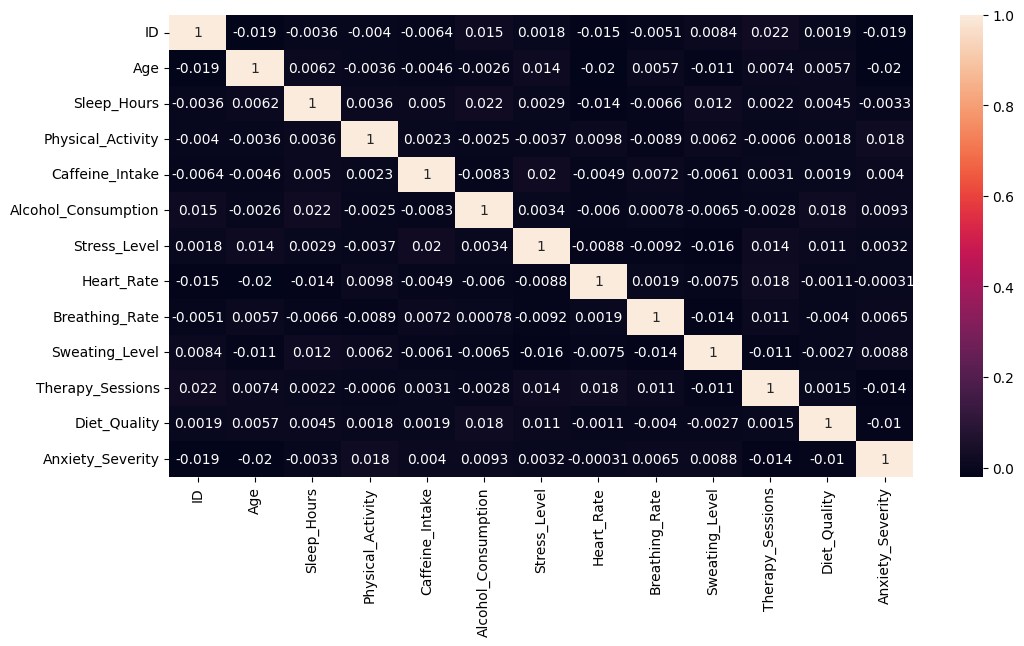

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df[con].corr(), annot=True)
plt.show()

# ANOVA

In [15]:
cat

['Gender',
 'Occupation',
 'Smoking',
 'Family_History',
 'Dizziness',
 'Medication',
 'Major_Life_Event']

In [16]:
con

['ID',
 'Age',
 'Sleep_Hours',
 'Physical_Activity',
 'Caffeine_Intake',
 'Alcohol_Consumption',
 'Stress_Level',
 'Heart_Rate',
 'Breathing_Rate',
 'Sweating_Level',
 'Therapy_Sessions',
 'Diet_Quality',
 'Anxiety_Severity']

In [17]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [18]:
df = df.rename(columns={"Stress Level (1-10)": "Stress_Level",
                        "Family History of Anxiety": "Family_History"})
model = ols("Stress_Level ~ C(Family_History)", df).fit()


In [19]:
q = anova_lm(model)
q

,df,sum_sq,mean_sq,F,PR(>F)
C(Family_History),1.0,18.582723,18.582723,2.214094,0.136782
Residual,11998.0,100698.316527,8.392925,NaN,NaN


In [20]:
q.iloc[0,-1]

0.13678162953575926

In [21]:
def ANOVA(df, cat_col, con_col):
  from statsmodels.formula.api import ols
  from statsmodels.stats.anova import anova_lm
  model = ols(f"{con_col} ~ C({cat_col})", df).fit()
  q = anova_lm(model)
  p_value = q.iloc[0,-1]
  return p_value

In [22]:
ANOVA(df, "Gender", "Anxiety_Severity")

0.45456789803213815

In [23]:
cat

['Gender',
 'Occupation',
 'Smoking',
 'Family_History',
 'Dizziness',
 'Medication',
 'Major_Life_Event']

In [25]:
for i in cat:
  p_value = ANOVA(df, i, "Anxiety_Severity")
  print(f"p_value of {i} vs Anxiety severity is {p_value}")

p_value of Gender vs Anxiety severity is 0.45456789803213815
p_value of Occupation vs Anxiety severity is 0.3874748076013063
p_value of Smoking vs Anxiety severity is 0.3958980617562421
p_value of Family_History vs Anxiety severity is 0.667564944898182
p_value of Dizziness vs Anxiety severity is 0.04790054239628124
p_value of Medication vs Anxiety severity is 0.9957796380566375
p_value of Major_Life_Event vs Anxiety severity is 0.47933744117773447


# p_value of Dizziness vs Anxiety severity is 0.04790054239628124 is statistically significant at confidence level of 95%

# chi square test

In [27]:
cat

['Gender',
 'Occupation',
 'Smoking',
 'Family_History',
 'Dizziness',
 'Medication',
 'Major_Life_Event']

In [28]:
ctab = pd.crosstab(df.Gender, df.Anxiety_Severity)
ctab

Anxiety_Severity,1,2,3,4,5,6,7,8,9,10
Gender,,,,,,,,,,
Female,599,573,572,564,609,599,573,601,554,565
Male,563,549,546,584,603,575,596,547,587,573
Other,39,53,37,54,42,50,55,39,50,49


In [29]:
from scipy.stats import chi2_contingency
chi = chi2_contingency(ctab)

In [30]:
chi

Chi2ContingencyResult(statistic=15.540356183463523, pvalue=0.6245916045476048, dof=18, expected_freq=array([[581.38408333, 568.79791667, 559.11625   , 581.86816667,
        607.0405    , 592.518     , 592.518     , 574.60691667,
        576.54325   , 574.60691667],
       [572.77691667, 560.37708333, 550.83875   , 573.25383333,
        598.0535    , 583.746     , 583.746     , 566.10008333,
        568.00775   , 566.10008333],
       [ 46.839     ,  45.825     ,  45.045     ,  46.878     ,
         48.906     ,  47.736     ,  47.736     ,  46.293     ,
         46.449     ,  46.293     ]]))

In [32]:
p_value = chi[1]
p_value

0.6245916045476048

In [33]:
def chi_square(df, cat_col, con_col):
  from scipy.stats import chi2_contingency
  ctab = pd.crosstab(df[cat_col], df[con_col])
  chi = chi2_contingency(ctab)
  p_value = chi[1]
  return p_value


In [34]:
chi_square(df, "Gender", "Anxiety_Severity")

0.6245916045476048

In [35]:
for i in cat:
  p_value = chi_square(df, i, "Anxiety_Severity")
  print(f"p_value of {i} vs Anxiety severity is {p_value}")

p_value of Gender vs Anxiety severity is 0.6245916045476048
p_value of Occupation vs Anxiety severity is 0.5519811301378195
p_value of Smoking vs Anxiety severity is 0.10286546321384164
p_value of Family_History vs Anxiety severity is 0.6279343030087747
p_value of Dizziness vs Anxiety severity is 0.5056154896912906
p_value of Medication vs Anxiety severity is 0.6594676565605258
p_value of Major_Life_Event vs Anxiety severity is 0.8600289177660599
